In [15]:
!pip install geobr -q

Livraria

In [16]:
# Start coding here... 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geobr

**IMPORTAR TABELAS**

* BN = Belem Novo
* JB = Jardim Botanico
* POA = Porto Alegre 
* SP = São Paulo

In [17]:
poa_JB = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/POA_D10_JB.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
poa_BN = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/POA_D10_BN.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
sp_mirante = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/MIRANTE-A701.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])
sp_interlagos = pd.read_csv("DADOS_ORIGINAIS_10-02-2023/INTERLAGOS-A771.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null'])

sp_interlagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  24 non-null     object 
 1   Hora (UTC)            24 non-null     int64  
 2   Temp. Ins. (C)        24 non-null     float64
 3   Temp. Max. (C)        24 non-null     float64
 4   Temp. Min. (C)        24 non-null     float64
 5   Umi. Ins. (%)         24 non-null     float64
 6   Umi. Max. (%)         24 non-null     float64
 7   Umi. Min. (%)         24 non-null     float64
 8   Pto Orvalho Ins. (C)  24 non-null     float64
 9   Pto Orvalho Max. (C)  24 non-null     float64
 10  Pto Orvalho Min. (C)  24 non-null     float64
 11  Pressao Ins. (hPa)    24 non-null     float64
 12  Pressao Max. (hPa)    24 non-null     float64
 13  Pressao Min. (hPa)    24 non-null     float64
 14  Vel. Vento (m/s)      24 non-null     float64
 15  Dir. Vento (m/s)      24 

**GRAFICOS SÃO PAULO (plot)**

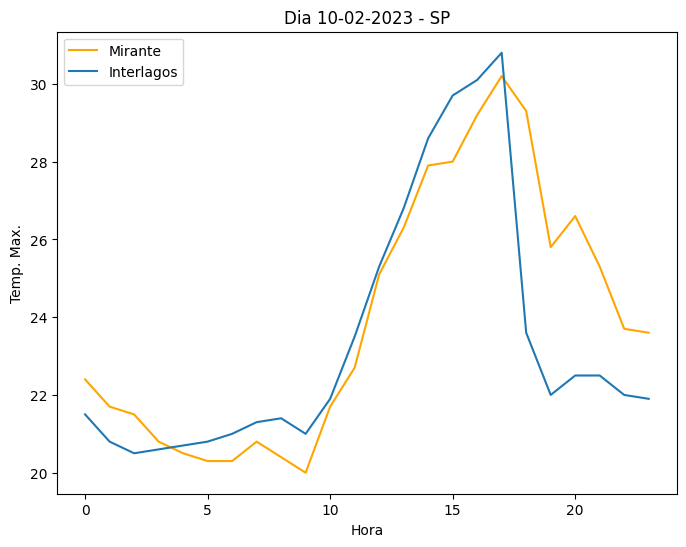

In [18]:
x = np.linspace(0, 23, num=24).tolist()

plt.figure(figsize=(8,6))
plt.plot(x, sp_mirante["Temp. Max. (C)"], label="Mirante", color='orange')
plt.plot(x, sp_interlagos["Temp. Max. (C)"], label="Interlagos")
plt.xlabel("Hora")
plt.ylabel("Temp. Max.")
plt.title("Dia 10-02-2023 - SP")
plt.legend(loc= 'upper left')
plt.show()

**GRAFICOS PORTO ALEGRE (plot)**

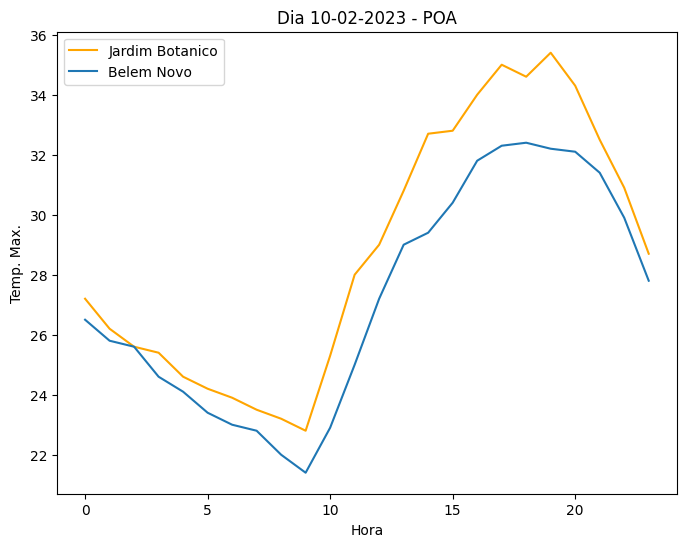

In [19]:
plt.figure(figsize=(8,6))
plt.plot(x, poa_JB["Temp. Max. (C)"], label="Jardim Botanico", color='orange')
plt.plot(x, poa_BN["Temp. Max. (C)"], label="Belem Novo")
plt.xlabel("Hora")
plt.ylabel("Temp. Max.")
plt.title("Dia 10-02-2023 - POA")
plt.legend(loc= 'upper left')
plt.show()

**GRAFICOS PORTO ALEGRE (hist)**

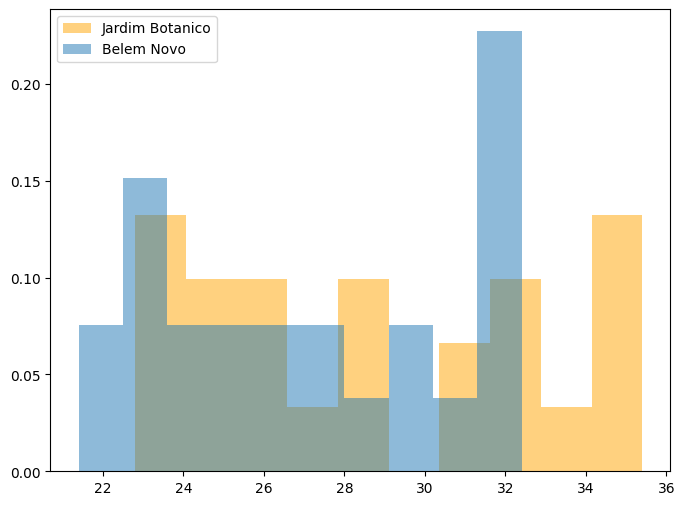

In [20]:
plt.figure(figsize=(8,6))
plt.hist(poa_JB["Temp. Max. (C)"], alpha=0.5, density=True, label="Jardim Botanico", color='orange')
plt.hist(poa_BN["Temp. Max. (C)"], alpha=0.5, density=True, label="Belem Novo")
plt.legend(loc= 'upper left')
plt.show()

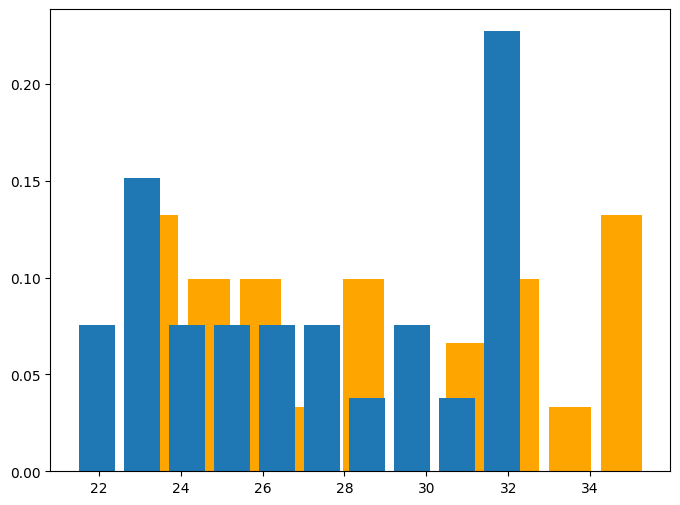

In [21]:
plt.figure(figsize=(8,6))
plt.hist(poa_JB["Temp. Max. (C)"], density=True,histtype='barstacked', rwidth=0.8, color='orange')
plt.hist(poa_BN["Temp. Max. (C)"], density=True,histtype='barstacked', rwidth=0.8)
plt.show()

**GEOPANDAS**

In [22]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [23]:
muni = geobr.read_municipality(code_muni='SP', year=2020)
muni.head()
muni.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code_muni     645 non-null    float64 
 1   name_muni     645 non-null    object  
 2   code_state    645 non-null    float64 
 3   abbrev_state  645 non-null    object  
 4   name_state    645 non-null    object  
 5   code_region   645 non-null    float64 
 6   name_region   645 non-null    object  
 7   geometry      645 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 40.4+ KB


0      São Paulo
1      São Paulo
2      São Paulo
3      São Paulo
4      São Paulo
         ...    
640    São Paulo
641    São Paulo
642    São Paulo
643    São Paulo
644    São Paulo
Name: name_state, Length: 645, dtype: object


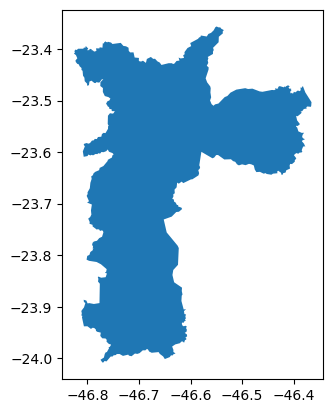

In [24]:
#print(muni.info)
gdf_muni = muni[muni.name_muni=='São Paulo']
gdf_muni.plot()

#print(muni.info)
print(muni['name_state'])


**Nome Estações**

Nome: SAO PAULO - MIRANTE
Codigo Estacao: A701
Latitude: -23.49638888
Longitude: -46.61999999

Nome: SAO PAULO - INTERLAGOS
Codigo Estacao: A771
Latitude: -23.724501
Longitude: -46.677501

Nome: PORTO ALEGRE - JARDIM BOTANICO
Codigo Estacao: A801
Latitude: -30.05361111
Longitude: -51.17472221

Nome: PORTO ALEGRE- BELEM NOVO
Codigo Estacao: B807
Latitude: -30.1861111
Longitude: -51.17805554

In [25]:
estaco = pd.DataFrame(
    {'City': ['Sao Paulo', 'Sao Paulo', 'Porto Alegre', 'Porto Alegre'],
    'Name': ['Mirante', 'Interlagos', 'Jardim Botanico', 'Belem Novo'],
    'Latitude': [-23.49638888, -23.724501, -30.05361111, -30.1861111],
    'Longitude': [-46.61999999, -46.677501, -51.17472221,  -51.17805554]})

In [26]:
points = gpd.GeoDataFrame(
    estaco, geometry=gpd.points_from_xy(estaco.Longitude, estaco.Latitude))

print(points.head())

           City             Name  ...  Longitude                     geometry
0     Sao Paulo          Mirante  ... -46.620000  POINT (-46.62000 -23.49639)
1     Sao Paulo       Interlagos  ... -46.677501  POINT (-46.67750 -23.72450)
2  Porto Alegre  Jardim Botanico  ... -51.174722  POINT (-51.17472 -30.05361)
3  Porto Alegre       Belem Novo  ... -51.178056  POINT (-51.17806 -30.18611)

[4 rows x 5 columns]


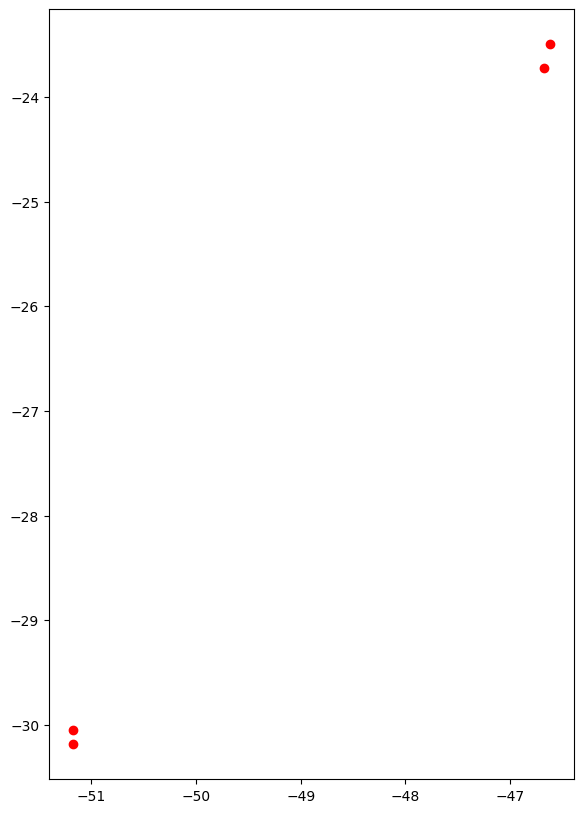

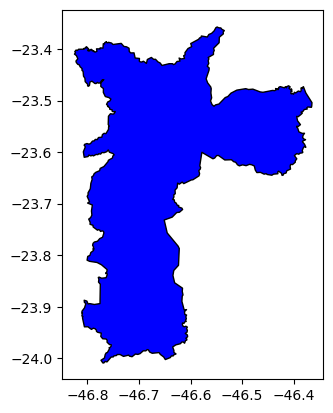

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

# We can now plot our ``GeoDataFrame``.
points.plot(ax=ax, color='red')

gdf_muni = muni[muni.name_muni=='São Paulo']
gdf_muni.plot(color='blue', edgecolor='black')
plt.show()

In [ ]:
gdf_muni.explore()

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
base = muni.plot(ax=ax, color='red')
gdf_muni.plot(ax=base, legend=True, cmap='Pastel2')
ax.set_title('Unidades de conversao \n Porto Alegre - RS')


**Test**

In [25]:
hora = poa_JB["Hora (UTC)"]

hora_modif = []
for i in hora:
    hora_str = str(i)
    if len(hora_str) == 1 and hora_str == '0':
        hora_modif.append(str(hora_str))
    elif len(hora_str) > 1 and len(hora_str) < 4:
        for j in hora_str:
            if j != '0':
                hora_modif.append(j)
    elif len(hora_str) == 4:
        hora_str = list(hora_str)
        for j in range(4,2,-1):
            hora_str.pop()
        hora_str = hora_str[0]+hora_str[1]
        hora_modif.append(hora_str)

print(hora_modif)

In [48]:
plt.figure(figsize=(8,6))
plt.plot(hora_modif, sp_mirante["Temp. Max. (C)"], label="Mirante", color='orange')
plt.plot(hora_modif, sp_interlagos["Temp. Max. (C)"], label="Interlagos")
plt.xlabel("Hora")
plt.ylabel("Temp. Max.")
plt.title("Dia 10-02-2023 - SP")
plt.legend(loc= 'upper left')
plt.show()

NameError: name 'hora_modif' is not defined

<Figure size 800x600 with 0 Axes>

In [46]:
import folium

# Define the center of our map.
lat, lon = -23.49639, -46.62000


my_map = folium.Map(location=[lat, lon], zoom_start=10)
points.plot(ax=ax, color='red')
my_map